In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")
from importlib import reload

import wrangle as w

In [2]:
zillow = w.acquire_zillow_data(new=True)

In [3]:
zillow.shape

(52205, 16)

In [4]:
pd.options.display.float_format = '{:,.3f}'.format
zillow.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,"52,205.000","12,987,391.477","3,212,829.029","10,711,855.000","11,508,447.000","12,575,683.000","14,127,123.000","167,639,152.000"
logerror,"52,205.000",0.018,0.177,-4.655,-0.025,0.007,0.041,5.263
bathrooms,"52,205.000",2.303,1.019,0.000,2.000,2.000,3.000,18.000
bedrooms,"52,205.000",3.306,0.940,0.000,3.000,3.000,4.000,14.000
sqft,"52,200.000","1,922.808","1,003.286",128.000,"1,268.000","1,659.000","2,305.000","21,929.000"
fips,"52,205.000","6,049.091",20.985,"6,037.000","6,037.000","6,037.000","6,059.000","6,111.000"
latitude,"52,205.000","34,022,716.374","273,991.906","33,340,620.000","33,827,075.000","34,023,835.000","34,187,161.000","34,818,767.000"
longitude,"52,205.000","-118,193,894.407","356,146.875","-119,475,416.000","-118,400,532.000","-118,153,037.000","-117,929,498.000","-117,554,636.000"
lotsizesquarefeet,"51,848.000","11,242.361","86,644.591",236.000,"5,581.000","6,839.000","8,778.250","6,971,010.000"
yearbuilt,"52,205.000","1,963.421",23.126,"1,878.000","1,950.000","1,961.000","1,979.000","2,016.000"


In [5]:
feature_check=['fireplace', 'pool', 'deck', 'hottub', 'garage']

In [6]:
zillow_new = w.clean_zillow(zillow, feature_check)

In [7]:
zillow_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51843 entries, 0 to 52204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   parcelid           51843 non-null  int64  
 1   logerror           51843 non-null  float64
 2   bathrooms          51843 non-null  float64
 3   bedrooms           51843 non-null  float64
 4   sqft               51843 non-null  float64
 5   latitude           51843 non-null  float64
 6   longitude          51843 non-null  float64
 7   lotsizesquarefeet  51843 non-null  float64
 8   logerror           51843 non-null  float64
 9   fireplace          51843 non-null  float64
 10  deck               51843 non-null  float64
 11  pool               51843 non-null  float64
 12  garage             51843 non-null  float64
 13  hottub             51843 non-null  float64
 14  county             51843 non-null  object 
 15  2017_age           51843 non-null  int64  
dtypes: float64(13), int64(

In [4]:
clean_zillow = w.clean_zillow(zillow)

In [14]:
clean_zillow.shape

(52205, 30)

In [12]:
zillow_new.dropna(inplace=True)

In [8]:
zillow_new.shape[0]/52442

0.9885778574425079

In [9]:
zillow_bedbath = zillow_new[(zillow_new['bathrooms'] > 0 ) & (zillow_new['bedrooms'] > 0)]

In [10]:
zillow_bedbath.shape[0]/52442

0.98724304946417

In [6]:
clean_zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52205 entries, 0 to 52204
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52205 non-null  int64  
 1   bathroomcnt                   52205 non-null  float64
 2   bedroomcnt                    52205 non-null  float64
 3   calculatedbathnbr             52145 non-null  float64
 4   calculatedfinishedsquarefeet  52200 non-null  float64
 5   finishedsquarefeet12          52037 non-null  float64
 6   fullbathcnt                   52145 non-null  float64
 7   latitude                      52205 non-null  float64
 8   longitude                     52205 non-null  float64
 9   lotsizesquarefeet             51848 non-null  float64
 10  propertycountylandusecode     52205 non-null  object 
 11  propertyzoningdesc            33732 non-null  object 
 12  rawcensustractandblock        52205 non-null  float64
 13  r

In [7]:
pd.options.display.float_format = '{:,.3f}'.format
clean_zillow.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,"52,205.000","12,987,391.477","3,212,829.029","10,711,855.000","11,508,447.000","12,575,683.000","14,127,123.000","167,639,152.000"
bathroomcnt,"52,205.000",2.303,1.019,0.000,2.000,2.000,3.000,18.000
bedroomcnt,"52,205.000",3.306,0.940,0.000,3.000,3.000,4.000,14.000
calculatedbathnbr,"52,145.000",2.305,1.018,1.000,2.000,2.000,3.000,18.000
calculatedfinishedsquarefeet,"52,200.000","1,922.808","1,003.286",128.000,"1,268.000","1,659.000","2,305.000","21,929.000"
finishedsquarefeet12,"52,037.000","1,924.983","1,003.176",128.000,"1,270.000","1,661.000","2,308.000","21,929.000"
fullbathcnt,"52,145.000",2.240,0.993,1.000,2.000,2.000,3.000,18.000
latitude,"52,205.000","34,022,716.374","273,991.906","33,340,620.000","33,827,075.000","34,023,835.000","34,187,161.000","34,818,767.000"
longitude,"52,205.000","-118,193,894.407","356,146.875","-119,475,416.000","-118,400,532.000","-118,153,037.000","-117,929,498.000","-117,554,636.000"
lotsizesquarefeet,"51,848.000","11,242.361","86,644.591",236.000,"5,581.000","6,839.000","8,778.250","6,971,010.000"


In [9]:
palindrome('madam')

True

In [12]:
clean_zillow.heatingorsystemdesc.value_counts()

Central       20687
Floor/Wall    12517
Forced air      517
Solar            85
None             16
Baseboard         7
Radiant           6
Gravity           2
Yes               1
Name: heatingorsystemdesc, dtype: int64

In [16]:
clean_zillow.lotsizesquarefeet.nunique()

14241

In [17]:
zillow.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,"52,205.000","12,987,391.477","3,212,829.029","10,711,855.000","11,508,447.000","12,575,683.000","14,127,123.000","167,639,152.000"
basementsqft,47.000,678.979,711.825,38.000,263.500,512.000,809.500,"3,560.000"
bathroomcnt,"52,205.000",2.303,1.019,0.000,2.000,2.000,3.000,18.000
bedroomcnt,"52,205.000",3.306,0.940,0.000,3.000,3.000,4.000,14.000
calculatedbathnbr,"52,145.000",2.305,1.018,1.000,2.000,2.000,3.000,18.000
decktypeid,382.000,66.000,0.000,66.000,66.000,66.000,66.000,66.000
finishedfloor1squarefeet,"4,347.000","1,542.055",669.979,184.000,"1,150.000","1,408.000","1,750.500","6,912.000"
calculatedfinishedsquarefeet,"52,200.000","1,922.808","1,003.286",128.000,"1,268.000","1,659.000","2,305.000","21,929.000"
finishedsquarefeet12,"52,037.000","1,924.983","1,003.176",128.000,"1,270.000","1,661.000","2,308.000","21,929.000"
finishedsquarefeet50,"4,347.000","1,562.981",740.717,184.000,"1,152.000","1,413.000","1,763.500","12,467.000"


In [23]:
feature_check=['fireplacecnt', 'poolcnt', 'decktypeid', 'hashottuborspa']

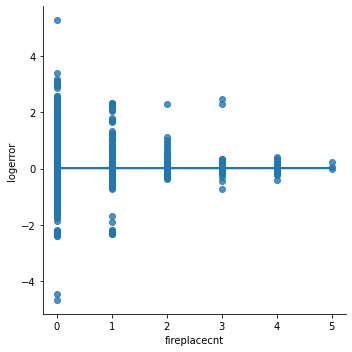

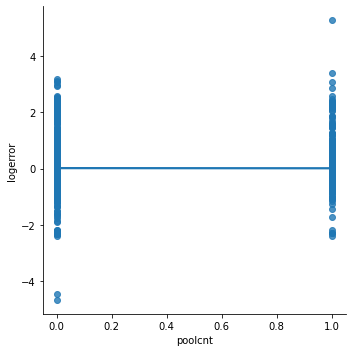

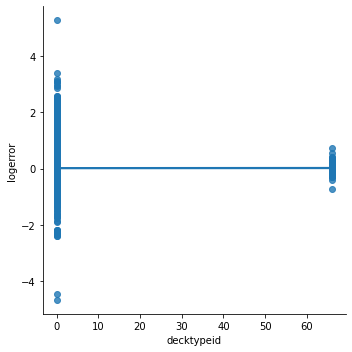

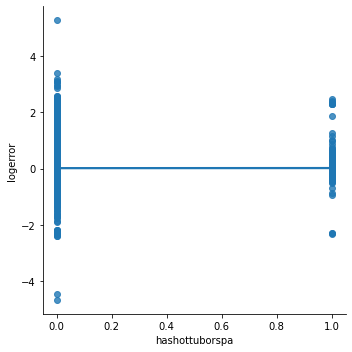

In [27]:
for yay in feature_check:
    sns.lmplot(data=zillow, x=yay, y='logerror')

In [25]:
feature_check=['fireplacecnt', 'poolcnt', 'decktypeid', 'hashottuborspa', 'garagecarcnt']
for feature in feature_check:
        zillow[feature]=zillow[feature].replace(r"^\s*$", np.nan, regex=True)     
        # fill optional features with 0 assumption that if it was not mark it did not exist
        zillow[feature] = zillow[feature].fillna(0)

In [26]:
zillow.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,"52,205.000","12,987,391.477","3,212,829.029","10,711,855.000","11,508,447.000","12,575,683.000","14,127,123.000","167,639,152.000"
basementsqft,47.000,678.979,711.825,38.000,263.500,512.000,809.500,"3,560.000"
bathroomcnt,"52,205.000",2.303,1.019,0.000,2.000,2.000,3.000,18.000
bedroomcnt,"52,205.000",3.306,0.940,0.000,3.000,3.000,4.000,14.000
calculatedbathnbr,"52,145.000",2.305,1.018,1.000,2.000,2.000,3.000,18.000
decktypeid,"52,205.000",0.483,5.625,0.000,0.000,0.000,0.000,66.000
finishedfloor1squarefeet,"4,347.000","1,542.055",669.979,184.000,"1,150.000","1,408.000","1,750.500","6,912.000"
calculatedfinishedsquarefeet,"52,200.000","1,922.808","1,003.286",128.000,"1,268.000","1,659.000","2,305.000","21,929.000"
finishedsquarefeet12,"52,037.000","1,924.983","1,003.176",128.000,"1,270.000","1,661.000","2,308.000","21,929.000"
finishedsquarefeet50,"4,347.000","1,562.981",740.717,184.000,"1,152.000","1,413.000","1,763.500","12,467.000"


In [30]:
look_here = zillow[zillow.numberofstories.isnull()]

In [31]:
look_here.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,"37,698.000","12,175,329.676","2,974,273.630","10,711,855.000","11,263,122.500","12,035,916.500","12,741,685.500","167,639,152.000"
basementsqft,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathroomcnt,"37,698.000",2.299,1.094,0.000,2.000,2.000,3.000,18.000
bedroomcnt,"37,698.000",3.256,0.958,0.000,3.000,3.000,4.000,14.000
calculatedbathnbr,"37,672.000",2.301,1.093,1.000,2.000,2.000,3.000,18.000
decktypeid,"37,698.000",0.002,0.340,0.000,0.000,0.000,0.000,66.000
finishedfloor1squarefeet,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
calculatedfinishedsquarefeet,"37,694.000","1,921.696","1,059.731",128.000,"1,237.000","1,632.000","2,313.000","21,929.000"
finishedsquarefeet12,"37,692.000","1,921.760","1,059.722",128.000,"1,237.750","1,632.000","2,313.000","21,929.000"
finishedsquarefeet50,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
